# Linear Regression

## 실습2 - Multi linear regression
>- 2개 이상의 독립변수로 종속변수 예측

### 회귀분석이란
> 단순히 회귀식을 추정하는 것만 의미하지 않음, 즉 추정된 회귀식이 정말로 종속변수와 독립변수간 변량을 잘 설명할 수 있는지 추정된 회귀 계수가 정말로 의미 있는 값인지(즉, 0이 아닌지)에 대한 통계적 검정(statistical test)을 해야함

## 회귀분석과정

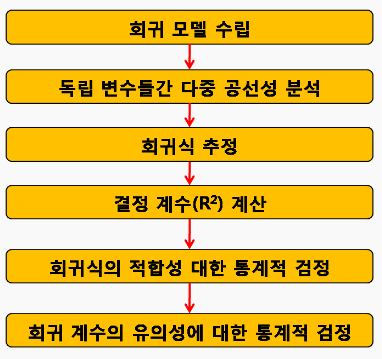

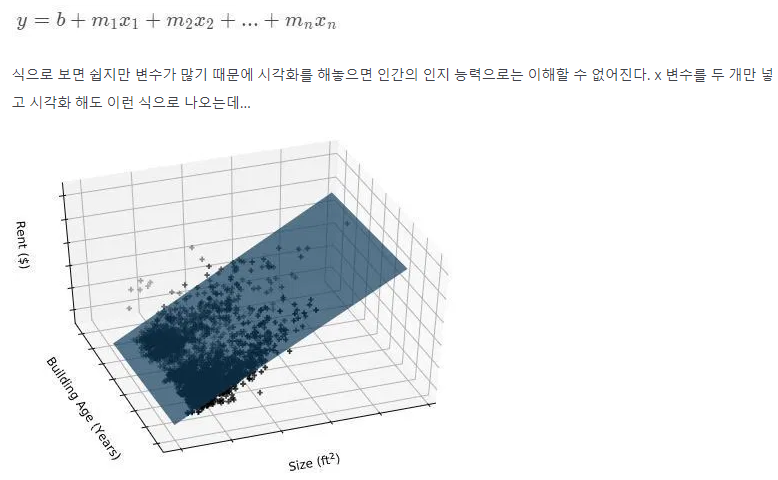

### 실습 Data

>**※ 프랜차이즈 매장 연간 순 매출액 예측 ※**
        
        Dataset: All Greens Franchise
        The data (X1, X2, X3, X4, X5, X6) are for each franchise store.
         X1 = annual net sales / 1000달러 [연간 순 매출액 / 1000달러 -> 실질적인 반응변수(y)임]
         X2 = number sq. ft./1000 [제곱 피트 수(매장 면적 뜻함) / 1000]
         X3 = inventory / 1000달러 [인벤토리 / 1,000달러]
         X4 = amount spent on advertizing / 1000달러 [광고 비용 / 1,000달러]
         X5 = size of sales district / 1000families [판매 지역의 규모/ 1000가구]
         X6 = number of competing stores in district [지역 내 경쟁 상점 수]
        data_type: Numeric
        data_link: http://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/mlr/frames/frame.html
        

In [1]:
import numpy as np
import pandas as pd

In [2]:
Sales_data = pd.read_csv(r'C:\Users\User\Desktop\data\franchies.csv')

# 해당 column에 이름 부여 #
Sales_data.columns = ['sales','sqft','inventory','advertizing','district','competing'] 

Sales_data # 총 27 X 6

,sales,sqft,inventory,advertizing,district,competing
0,231.0,3.0,294,8.2,8.200000,11
1,156.0,2.2,232,6.9,4.100000,12
2,10.0,0.5,149,3.0,4.300000,15
3,519.0,5.5,600,12.0,16.100000,1
4,437.0,4.4,567,10.6,14.100000,5
5,487.0,4.8,571,11.8,12.700000,4
6,299.0,3.1,512,8.1,10.100000,10
7,195.0,2.5,347,7.7,8.400000,12
8,20.0,1.2,212,3.3,2.100000,15
9,68.0,0.6,102,4.9,4.700000,8


In [3]:
# 데이터가 잘 들어갔는지 확인용
Sales_data.head(n=10) # 맨 위부터 밑에 n개까지 data 확인 #

,sales,sqft,inventory,advertizing,district,competing
0,231.0,3.0,294,8.2,8.2,11
1,156.0,2.2,232,6.9,4.1,12
2,10.0,0.5,149,3.0,4.3,15
3,519.0,5.5,600,12.0,16.1,1
4,437.0,4.4,567,10.6,14.1,5
5,487.0,4.8,571,11.8,12.7,4
6,299.0,3.1,512,8.1,10.1,10
7,195.0,2.5,347,7.7,8.4,12
8,20.0,1.2,212,3.3,2.1,15
9,68.0,0.6,102,4.9,4.7,8


In [4]:
# # 데이터가 잘 들어갔는지 확인용
Sales_data.tail(n=10) # 아래부터 위 n개까지 data확인 #

,sales,sqft,inventory,advertizing,district,competing
17,161.0,2.6,196,7.2,6.300000,13
18,397.0,3.8,453,10.4,13.900000,7
19,497.0,5.3,518,11.5,16.299999,1
20,528.0,5.6,615,12.3,16.000000,0
21,99.0,0.8,278,2.8,6.500000,14
22,0.5,1.1,142,3.1,1.600000,12
23,347.0,3.6,461,9.6,11.300000,6
24,341.0,3.5,382,9.8,11.500000,5
25,507.0,5.1,590,12.0,15.700000,0
26,400.0,8.6,517,7.0,12.000000,8


### correlation(상관관계) # sales기준
> 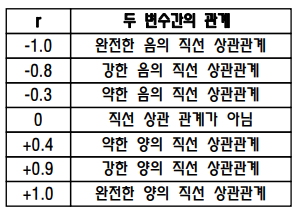

In [5]:
Sales_data.corr()

,sales,sqft,inventory,advertizing,district,competing
sales,1.000000,0.894092,0.945504,0.914024,0.953683,-0.912236
sqft,0.894092,1.000000,0.843616,0.748587,0.838023,-0.765738
inventory,0.945504,0.843616,1.000000,0.906231,0.863917,-0.807380
advertizing,0.914024,0.748587,0.906231,1.000000,0.795434,-0.841280
district,0.953683,0.838023,0.863917,0.795434,1.000000,-0.869590
competing,-0.912236,-0.765738,-0.807380,-0.841280,-0.869590,1.000000


#### 1. X,y 정의

In [6]:
X, y = Sales_data.iloc[:,1:], Sales_data.iloc[:,0]
print(X.shape, y.shape)

(27, 5) (27,)


#### 2. 모델 학습 및 계수확인

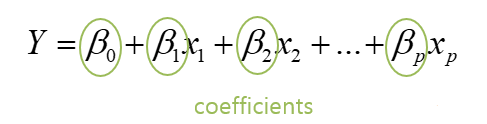

In [7]:
from sklearn.linear_model import LinearRegression

In [8]:
#모델 객체 생성
m_reg = LinearRegression(fit_intercept = True) #fit_intercept -> beta0 생성 여부

#모델 학습
m_reg.fit(X, y) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [9]:
m_reg.intercept_

-18.859414160020663

In [10]:
m_reg.coef_

array([16.20157356,  0.17463515, 11.52626903, 13.5803129 , -5.31097141])

#### 2.1 기울기값 계수 비교(1) 

In [11]:
# 선형 모델의 절편값 β0 # 추정된 상수항
beta0 = m_reg.intercept_

# 선형 모델의 기울기값 β1 # 추정된 가중치 벡터
beta1 = m_reg.coef_
print('y = {} + {} x1 + {} x2 + {} x3 + {} x4 + {} x5'.format(round(beta0,3), round(beta1[0],3), round(beta1[1],3),\
                                                    round(beta1[2],3), round(beta1[3],3), round(beta1[4],3)))

y = -18.859 + 16.202 x1 + 0.175 x2 + 11.526 x3 + 13.58 x4 + -5.311 x5


#### 2.2 기울기값 계수 비교(2)

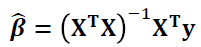

In [12]:
n = len(X)

# np.c_: c_을 사용하여 1차원 배열을 2차원 배열에 열로 쌓음
x = np.c_[np.ones(n), X]
print('x 배열의 차원: {} '.format(x.shape))

# matmul: matrix끼리 multiplication(곱) 연산을 할 때 사용
xtx = np.matmul(x.T,x)
print('xtx 배열의 차원: {} '.format(xtx.shape))

xtx_inv=np.linalg.inv(xtx)
print('xtx_inv 배열의 차원: {} '.format(xtx.shape))

beta=np.matmul(np.matmul(xtx_inv, x.T), y)

print('y = {} + {} x1 + {} x2 + {} x3 + {} x4 + {} x5'.format(round(beta[0],3), round(beta[1],3), round(beta[2],3),\
                                                    round(beta[3],3), round(beta[4],3), round(beta[5],3)))

x 배열의 차원: (27, 6) 
xtx 배열의 차원: (6, 6) 
xtx_inv 배열의 차원: (6, 6) 
y = -18.859 + 16.202 x1 + 0.175 x2 + 11.526 x3 + 13.58 x4 + -5.311 x5


In [15]:
# set_printoptions: 부동 소수점(예시: 2^n승) 숫자, 배열 및 기타 NumPy 객체가 표시되는 방식을 결정 
np.set_printoptions(suppress=True, precision=True)
print(x)

print(x.shape)

[[  1.    3.  294.    8.2   8.2  11. ]
 [  1.    2.2 232.    6.9   4.1  12. ]
 [  1.    0.5 149.    3.    4.3  15. ]
 [  1.    5.5 600.   12.   16.1   1. ]
 [  1.    4.4 567.   10.6  14.1   5. ]
 [  1.    4.8 571.   11.8  12.7   4. ]
 [  1.    3.1 512.    8.1  10.1  10. ]
 [  1.    2.5 347.    7.7   8.4  12. ]
 [  1.    1.2 212.    3.3   2.1  15. ]
 [  1.    0.6 102.    4.9   4.7   8. ]
 [  1.    5.4 788.   17.4  12.3   1. ]
 [  1.    4.2 577.   10.5  14.    7. ]
 [  1.    4.7 535.   11.3  15.    3. ]
 [  1.    0.6 163.    2.5   2.5  14. ]
 [  1.    1.2 168.    4.7   3.3  11. ]
 [  1.    1.6 151.    4.6   2.7  10. ]
 [  1.    4.3 342.    5.5  16.    4. ]
 [  1.    2.6 196.    7.2   6.3  13. ]
 [  1.    3.8 453.   10.4  13.9   7. ]
 [  1.    5.3 518.   11.5  16.3   1. ]
 [  1.    5.6 615.   12.3  16.    0. ]
 [  1.    0.8 278.    2.8   6.5  14. ]
 [  1.    1.1 142.    3.1   1.6  12. ]
 [  1.    3.6 461.    9.6  11.3   6. ]
 [  1.    3.5 382.    9.8  11.5   5. ]
 [  1.    5.1 590.   12. 

In [16]:
# xtx 부가설명
print(x.T)
print(x.T.shape)
print(x.shape)
print(xtx.shape)
print(xtx)

[[  1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.
    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.
    1.    1.    1. ]
 [  3.    2.2   0.5   5.5   4.4   4.8   3.1   2.5   1.2   0.6   5.4   4.2
    4.7   0.6   1.2   1.6   4.3   2.6   3.8   5.3   5.6   0.8   1.1   3.6
    3.5   5.1   8.6]
 [294.  232.  149.  600.  567.  571.  512.  347.  212.  102.  788.  577.
  535.  163.  168.  151.  342.  196.  453.  518.  615.  278.  142.  461.
  382.  590.  517. ]
 [  8.2   6.9   3.   12.   10.6  11.8   8.1   7.7   3.3   4.9  17.4  10.5
   11.3   2.5   4.7   4.6   5.5   7.2  10.4  11.5  12.3   2.8   3.1   9.6
    9.8  12.    7. ]
 [  8.2   4.1   4.3  16.1  14.1  12.7  10.1   8.4   2.1   4.7  12.3  14.
   15.    2.5   3.3   2.7  16.    6.3  13.9  16.3  16.    6.5   1.6  11.3
   11.5  15.7  12. ]
 [ 11.   12.   15.    1.    5.    4.   10.   12.   15.    8.    1.    7.
    3.   14.   11.   10.    4.   13.    7.    1.    0.   14.   12.    6.
    5.    0.  

In [17]:
#xtx_inv -> xtx의 inverse matrix 
print(xtx_inv)
print(xtx_inv.shape)

[[ 2.9 -0.   0.  -0.1 -0.1 -0.2]
 [-0.   0.  -0.   0.  -0.   0. ]
 [ 0.  -0.   0.  -0.  -0.  -0. ]
 [-0.1  0.  -0.   0.   0.   0. ]
 [-0.1 -0.  -0.   0.   0.   0. ]
 [-0.2  0.  -0.   0.   0.   0. ]]
(6, 6)


In [18]:
# 두 배열의 행렬 곱으로 beta들을 구함
print(xtx_inv.shape)
print(x.T.shape)
print(y.shape)

beta

(6, 6)
(6, 27)
(27,)


array([-18.9,  16.2,   0.2,  11.5,  13.6,  -5.3])

#### 3. 예측 및 성능 확인

In [19]:
y_pred = m_reg.predict(X)
print(np.round(list(y_pred),3)) # 27개
print(np.round(m_reg.score(X, y),3))

[228.5 128.8  28.6 526.7 438.6 445.9 298.2 221.3  24.5  86.5 568.5 423.9
 468.7   7.7  70.5  70.  370.  157.  393.3 506.1 538.3  88.8  17.5 352.2
 347.1 518.3 411.9]
0.993


In [20]:
import matplotlib.pyplot as plt

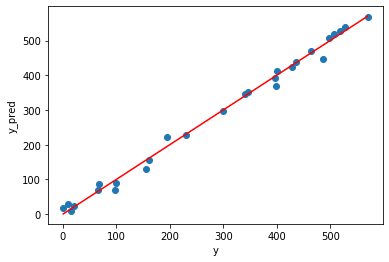

In [21]:
# 실측치y와 예측치y의 관계성 #
plt.scatter(y, y_pred)
line = np.linspace(min(y.values), max(y.values), 1000)
plt.plot(line, line, color = 'r')
plt.xlabel('y')
plt.ylabel('y_pred')
plt.show()

#### 3.1 R-square와 Adjusted_R-square의 차이점
> 1. 독립 변수를 모델에 추가할 때마다 독립 변수가 미미하더라도 R-square는 증가함. 결코 줄어들지 않음. 반면, 조정된 R-제곱은 독립 변수가 유의하고 종속 변수에 영향을 미칠 때만 증가함
> 2. Adjusted_R-square는 R-square가 0에 가까울 때 음수가 될 수 있다.
> 3. Adjusted_R-square 값은 항상 R-square 값보다 작거나 같다.

In [22]:
# 다른 툴 사용 예시 #
from sklearn.metrics import r2_score as r2
r2 = np.round(r2(y, y_pred),3)
r2

0.993

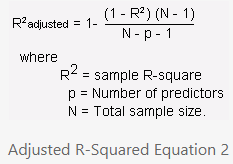

In [24]:
# 조정된 결정계수 #
n, p = Sales_data.iloc[:,1:].shape

adj_r2 = 1 - ((1-r2) * (n-1)) / (n-p-1)
adj_r2

0.9913333333333333

In [25]:
# Sum of Square Error
SSE = sum((y-y_pred)**2)

In [26]:
# Sum of Square Regression
SSR = sum((y_pred-np.mean(y))**2)

In [27]:
SST = SSE + SSR

In [28]:
SSE,SSR,SST

(6541.410343671715, 952538.9415081793, 959080.351851851)

### Degree of freedom (자유도) 설명
링크 : https://brunch.co.kr/@zhoyp/174

In [29]:
n,p = Sales_data.iloc[:,1:].shape
n,p

(27, 5)

In [30]:
# mean square error / 회귀로 예측해도 좁힐 수 없는 관측값과의 차이가 얼마나 있는지 말해주는 수치
MSE=SSE/(n-p-1)

In [31]:
# regression mean square:평균으로 말하는 것과 회귀로 예측해서 말하는 것의 차이가 얼마나 있는지를 말해주는 수치
MSR=SSR/p

In [32]:
MSE,MSR

(311.495730651034, 190507.78830163585)

In [33]:
# f분포 하에서 관찰한 값이 얼마나 이상한지 아닌지, 보기힘든건지 아닌지 판단
# 즉 모형의 적합성을 판단하기 위해 f의 수치를 확인
# 공식: 독립변수(X)로 의해 설명된 variation(MSR) / 독립변수(X)로 의해 설명되지 못한 variation(MSE) 
f=MSR/MSE
f

611.5903672370396

### 중간 정리
> 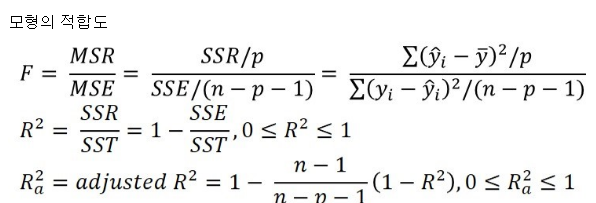

In [34]:
# 수치해석기능을 제공하는 파이썬 패키지
# stats 서브패키지는 확률분포 분석을 위한 다양한 기능을 제공
from scipy import stats

In [35]:
# pvalue로 기각할지 선정 
# cdf(cumulative distribution function: 누적분포함수)
# 회귀분석은 F-통계량에 대한 우측검정으로 가설을 검정
pvalue = 1-stats.f.cdf(f,p,n-p-1) # f값이 x임 # df은 분자, 분모 순서대로 넣기 -> "pvalue"
pvalue

1.1102230246251565e-16

### ※ F Destribution 예시

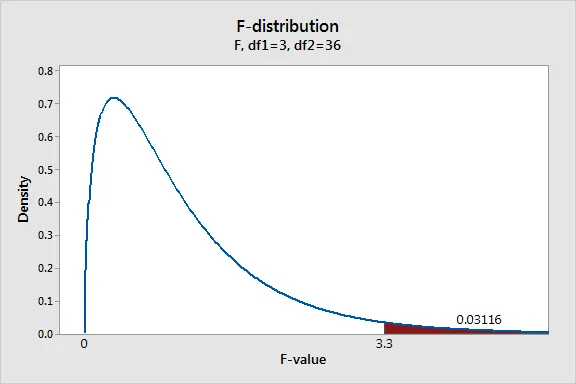

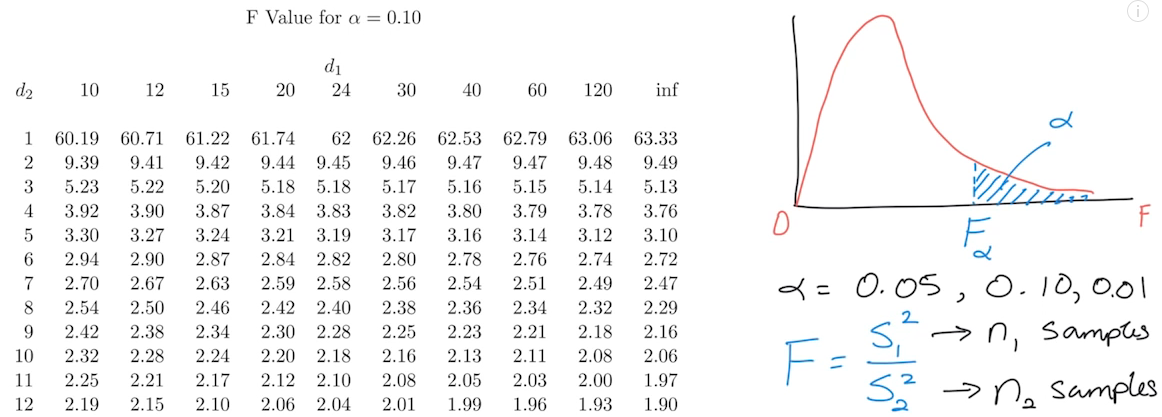

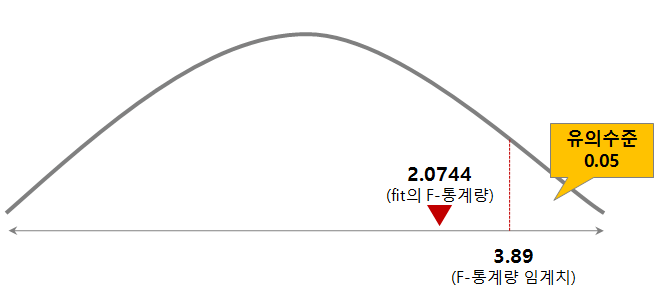

#### 4. 모델 요약

In [36]:
import statsmodels.api as sm 

In [37]:
X1 = sm.add_constant(X)

In [42]:
# 예시1
reg = sm.OLS(y, X1).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                     611.6
Date:                Sun, 22 Mar 2020   Prob (F-statistic):           5.40e-22
Time:                        17:23:44   Log-Likelihood:                -112.43
No. Observations:                  27   AIC:                             236.9
Df Residuals:                      21   BIC:                             244.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         -18.8594     30.150     -0.626      0.538     -81.560      43.841
sqft           16.2016      3.544      4.571      0.000       8.831      23.573
inventory       0.1746      0.058      3.032      0.006       0.055       0.294
advertizing    11.5263      2.532      4.552      0.000       6.260      16.792
district       13.5803      1.770      7.671      0.000       9.898      17.262
competing      -5.3110      1.705     -3.114      0.005      -8.858      -1.764
==============================================================================
Omnibus:                        5.650   Durbin-Watson:                   1.789
Prob(Omnibus):                  0.059   Jarque-Bera (JB):                4.041
Skew:                           0.916   Prob(JB):                        0.133
Kurtosis:                       3.484   Cond. No.                     3.84e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.84e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [39]:
# 위 값 비교 #
beta=[m_reg.intercept_]+list(m_reg.coef_) 

print(beta)
print(f)
print(pvalue)

[-18.859414160020663, 16.20157356179461, 0.1746351543184638, 11.526269032116883, 13.580312897508977, -5.3109714096516125]
611.5903672370396
1.1102230246251565e-16


In [43]:
import statsmodels.formula.api as smf

In [44]:
# 예시2
model = smf.ols(formula = 'sales ~ sqft + inventory + advertizing + district + competing', data = Sales_data)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                     611.6
Date:                Sun, 22 Mar 2020   Prob (F-statistic):           5.40e-22
Time:                        17:24:11   Log-Likelihood:                -112.43
No. Observations:                  27   AIC:                             236.9
Df Residuals:                      21   BIC:                             244.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     -18.8594     30.150     -0.626      0.538     -81.560      43.841
sqft           16.2016      3.544      4.571      0.000       8.831      23.573
inventory       0.1746      0.058      3.032      0.006       0.055       0.294
advertizing    11.5263      2.532      4.552      0.000       6.260      16.792
district       13.5803      1.770      7.671      0.000       9.898      17.262
competing      -5.3110      1.705     -3.114      0.005      -8.858      -1.764
==============================================================================
Omnibus:                        5.650   Durbin-Watson:                   1.789
Prob(Omnibus):                  0.059   Jarque-Bera (JB):                4.041
Skew:                           0.916   Prob(JB):                        0.133
Kurtosis:                       3.484   Cond. No.                     3.84e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.84e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# 독립변수끼리 강한 상관관계를 가지면 다중공선성
> 1. F검정은 통과했으나 각각의 회귀계수가 t검정을 통과하지 못하는 경우
> 2. 예상하던 것과 달리 회귀계수의 부호가 반대일 정도로 괴리가 큰 경우
> 3. 데이터를 추가하거나 제거할 때 기존의 회귀계수가 극심하게 많이 변하는 경우

* 다중공선성은 VIF(Variation Inflation Factor)이라고 하며 VIFk 는 k 번째 변수의 다중공선성의 정도를 의미함

* VIF는 독립변수 전체의 다중공선성 정도를 하나의 수치로 제시하는 것이 아닌, 각각 입력 변수들을 대상으로 계산됨

* 다중공선성이 높으면 특정 변수 간의 의존도가 높아져 모델을 생성했을 때 과적합이 될 가능성이 큼

* 그래서 다중공선성이 높은 변수를 제거하고 모델을 생성함

* VIF 수식의 값이 15 이상 이면 해당 변수가 다중공선성이 존재하는 것으로 판단

In [45]:
from patsy import *

In [46]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [47]:
y, X = dmatrices('sales ~ sqft + inventory + advertizing + district + competing',data=Sales_data, return_type = "dataframe")
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

# intercept를 제외한 나머지 변수들이 다중공선성을 띄지 않음을 볼 수 있음
vif.round(1) 

,VIF Factor,features
0,78.8,Intercept
1,4.2,sqft
2,10.1,inventory
3,7.6,advertizing
4,6.9,district
5,5.8,competing
